In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import random

In [3]:
crimes = pd.read_csv("Untitled Folder/crimes.csv", index_col = None)
crimes.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,309158680,23053615,6,2023-04-12T07:00:00,"500 Block Smithfield St Pittsburgh, PA 15222",N,Central Business District,2,THEFT FROM AUTO,3934 Theft from Vehicle,201.0,6.0,6.0,-79.998119,40.440340
1,309165466,23053643,0,2023-04-12T09:00:00,"N Fairmount St & Rosetta St Pittsburgh, PA 15206",N,Garfield,5,99,9999 9999 - (Misc. Incident):,1114.0,9.0,2.0,-79.931355,40.466338
2,309165930,23053633,6,2023-04-11T23:00:00,"2100 Block Merriman Way Pittsburgh, PA 15203",N,South Side Flats,3,THEFT FROM AUTO,3934 Theft from Vehicle / 4106 Access Device F...,1609.0,3.0,3.0,-79.975876,40.430655
3,309168723,23053667,6,2023-04-12T01:05:00,"400 Block Orchard Pl Pittsburgh, PA 15210",N,Knoxville,3,THEFT,3921 Theft by Unlawful Taking or Disposition. ...,3001.0,3.0,5.0,-79.995428,40.417685
4,309168868,23053660,5,2023-04-12T07:30:00,"1400 Block Beldale St Pittsburgh, PA 15233",N,Manchester,1,BURGLARY,3502 Burglary.,2107.0,6.0,1.0,-80.028001,40.459059
5,309170098,23053666,10,2023-04-12T09:27:00,"100 Block Blvd Of The Allies Pittsburgh, PA 15222",N,Central Business District,2,TERRORISTIC THREATS,2706 Terroristic Threats.,201.0,6.0,6.0,-80.004963,40.439341
6,309170460,23053692,0,2023-04-12T10:07:00,"300 Block S Main St Pittsburgh, PA 15220",N,West End,6,99,9993 PFA Service with Weapons Supplement,2019.0,7.0,2.0,-79.957948,40.467383
7,307522371,23042007,0,2023-03-22T11:21:00,"Beacon St & Hobart Rd Pittsburgh, PA 15217",Y,Squirrel Hill South,4,99,3323 Stop Signs and Yield Signs. / 1543 Drivin...,1413.0,5.0,3.0,-79.934949,40.432133
8,307558931,23042205,10,2023-03-22T15:20:00,"900 Block Proctor Way Pittsburgh, PA 15210",N,Allentown,3,SIMPLE ASSAULT,2701 Simple Assault.,1803.0,3.0,5.0,-79.991222,40.420461
9,307570370,23042137,0,2023-03-22T15:30:00,"1200 Block Elwell St Pittsburgh, PA 15207",N,Lincoln Place,4,99,9999 9999 - (Misc. Incident):,3102.0,5.0,3.0,-79.915564,40.369533


In [4]:
crimes["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District    419
South Side Flats             143
Carrick                      101
Bluff                         82
East Liberty                  80
                            ... 
Regent Square                  2
Chartiers City                 2
New Homestead                  1
Outside County                 1
Swisshelm Park                 1
Name: INCIDENTNEIGHBORHOOD, Length: 92, dtype: int64

In [5]:
crimes.groupby("INCIDENTNEIGHBORHOOD").count()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny Center,21,21,21,21,21,21,21,21,21,21,16,16,16,16
Allegheny West,5,5,5,5,5,5,5,5,5,5,3,3,3,3
Allentown,43,43,43,43,43,43,43,43,43,43,40,40,40,40
Arlington,22,22,22,22,22,22,22,22,22,22,21,21,22,22
Arlington Heights,3,3,3,3,3,3,3,3,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,15,15,15,15,15,15,15,15,15,15,13,13,13,13
West End,14,14,14,14,14,14,14,14,14,14,13,13,13,13
West Oakland,10,10,10,10,10,10,10,10,10,10,7,7,7,7


In [6]:
crimes.groupby(["INCIDENTNEIGHBORHOOD"]).size().sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
New Homestead                  1
Swisshelm Park                 1
Outside County                 1
Chartiers City                 2
Regent Square                  2
                            ... 
East Liberty                  80
Bluff                         82
Carrick                      101
South Side Flats             143
Central Business District    419
Length: 92, dtype: int64

In [7]:
def filter (x, twenty):
    if len(x) < twenty:
        return True
    else:
        return False
crimesfinal = crimes.groupby('INCIDENTNEIGHBORHOOD').filter(filter,twenty =20)
crimesfinal.groupby('INCIDENTNEIGHBORHOOD').count()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny West,5,5,5,5,5,5,5,5,5,5,3,3,3,3
Arlington Heights,3,3,3,3,3,3,3,3,3,3,0,0,0,0
Bon Air,12,12,12,12,12,12,12,12,12,12,8,8,8,8
Chartiers City,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Duquesne Heights,16,16,16,16,16,16,16,16,16,16,9,9,9,9
Esplen,8,8,8,8,8,8,8,8,8,8,7,7,7,7
Fairywood,16,16,16,16,16,16,16,16,16,16,10,10,11,11
Fineview,10,10,10,10,10,10,10,10,10,10,8,8,8,8
Friendship,7,7,7,7,7,7,7,7,7,7,6,6,6,6


In [8]:
crimesfinal = crimes.groupby("INCIDENTNEIGHBORHOOD").size().sort_values(ascending=False)
crimesfinal.head(20)

INCIDENTNEIGHBORHOOD
Central Business District    419
South Side Flats             143
Carrick                      101
Bluff                         82
East Liberty                  80
Brookline                     76
Crawford-Roberts              71
Shadyside                     68
Mount Washington              68
Marshall-Shadeland            68
Lincoln-Lemington-Belmar      62
Sheraden                      62
Homewood North                61
Squirrel Hill South           59
Hazelwood                     58
Knoxville                     57
Brighton Heights              56
Beechview                     56
Bloomfield                    53
Perry South                   53
dtype: int64

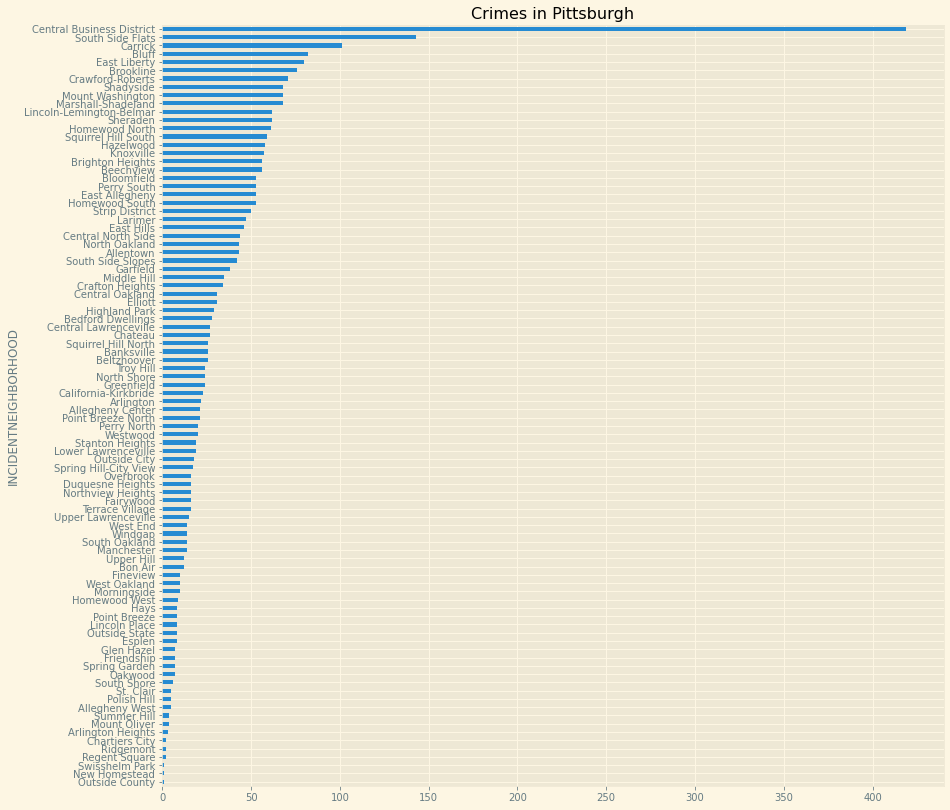

In [9]:
plt.style.use('Solarize_Light2')
crimesfinal.plot.barh(title = 'Crimes in Pittsburgh', x= 'IncidentNeighborhood', y='Number of Crimes', figsize=(14,14)).invert_yaxis()

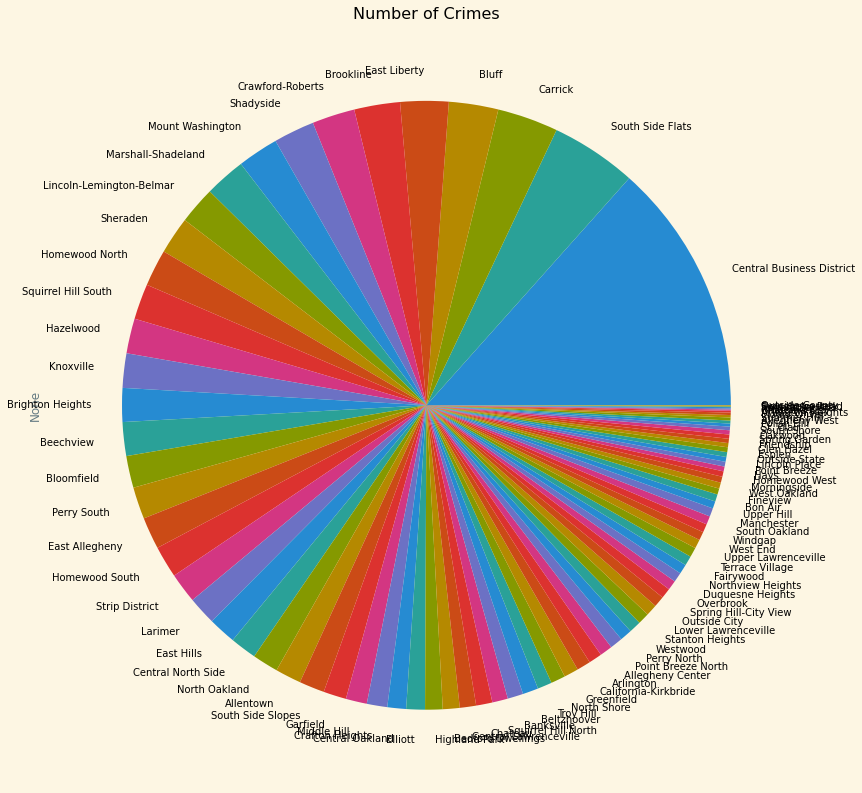

In [11]:
plt.style.use('Solarize_Light2')
crimesfinal.plot.pie(figsize = (14,14), title = "Number of Crimes")